<a href="https://colab.research.google.com/github/SHDaniels/DSPS_sDaniels/blob/main/hw7_sdaniels/shar_clusteringGenes_DSPS2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=e011e0c319670d1420e58a00e5f514396f5d5924c8bc55af831a9e10c26adcb9
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=5fca0dc807b3b1128c3d974665e453a7561f7ece98ef35c86eb18648a38da7f0
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy as sp
import sklearn as skl
from sklearn import cluster
import umap
import umap.plot
from scipy.cluster.hierarchy import dendrogram, linkage

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# I  read the data
in https://github.com/fedhere/DSPS_FBianco/tree/master/HW7
its called kidpackgene.csv

In [3]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv", index_col=0)

In [4]:
genes

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,-0.314408,0.131512,-0.049018,-0.674385,-0.289890,0.258422,-0.120400,-0.060359,0.706799,-0.326422,...,0.379001,0.009101,-0.182293,-0.270911,-0.434925,-0.031925,1.402160,0.502573,-0.061042,-0.206210
4221,-0.313823,-0.041095,-0.049798,-0.492502,-0.223146,0.172682,-0.164426,0.033539,0.420965,-0.180468,...,0.086748,0.198886,-0.167620,-0.336774,0.022460,-0.211773,0.379261,0.465487,0.024584,-0.264364
4222,-0.091283,0.118607,-0.088939,-0.349571,-0.107676,0.019609,0.187555,0.214635,0.210662,-0.127357,...,-0.121660,0.004138,-0.170726,-0.129437,-0.379607,0.007242,0.258818,0.284263,-0.008146,-0.047151
4223,-0.552395,0.125635,-0.290230,-1.283253,-0.870161,-0.131500,0.100046,0.153907,0.582813,-0.273445,...,0.219980,-0.503742,-0.727327,-0.477732,-0.523019,-0.382573,0.830773,0.246017,-0.002329,0.100187


make sure you are not reading the index as a feature! you can control this with the index_col paramter of the function pd.read_csv or remove the column after you read the data in


make sure you show the data and look at it carefully

In [5]:
genes.shape

(4224, 74)

# II  Explore and preprocess the data  explore the data.


## II a
missing values? (remember you can use the missingno package and visualize the missing values!). What should you do with them?

In [6]:
genes.replace('', np.NaN)

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,-0.314408,0.131512,-0.049018,-0.674385,-0.289890,0.258422,-0.120400,-0.060359,0.706799,-0.326422,...,0.379001,0.009101,-0.182293,-0.270911,-0.434925,-0.031925,1.402160,0.502573,-0.061042,-0.206210
4221,-0.313823,-0.041095,-0.049798,-0.492502,-0.223146,0.172682,-0.164426,0.033539,0.420965,-0.180468,...,0.086748,0.198886,-0.167620,-0.336774,0.022460,-0.211773,0.379261,0.465487,0.024584,-0.264364
4222,-0.091283,0.118607,-0.088939,-0.349571,-0.107676,0.019609,0.187555,0.214635,0.210662,-0.127357,...,-0.121660,0.004138,-0.170726,-0.129437,-0.379607,0.007242,0.258818,0.284263,-0.008146,-0.047151
4223,-0.552395,0.125635,-0.290230,-1.283253,-0.870161,-0.131500,0.100046,0.153907,0.582813,-0.273445,...,0.219980,-0.503742,-0.727327,-0.477732,-0.523019,-0.382573,0.830773,0.246017,-0.002329,0.100187


In [7]:
genes.isnull().values.any()

False

In [8]:
import missingno as msno
%matplotlib inline


<Axes: >

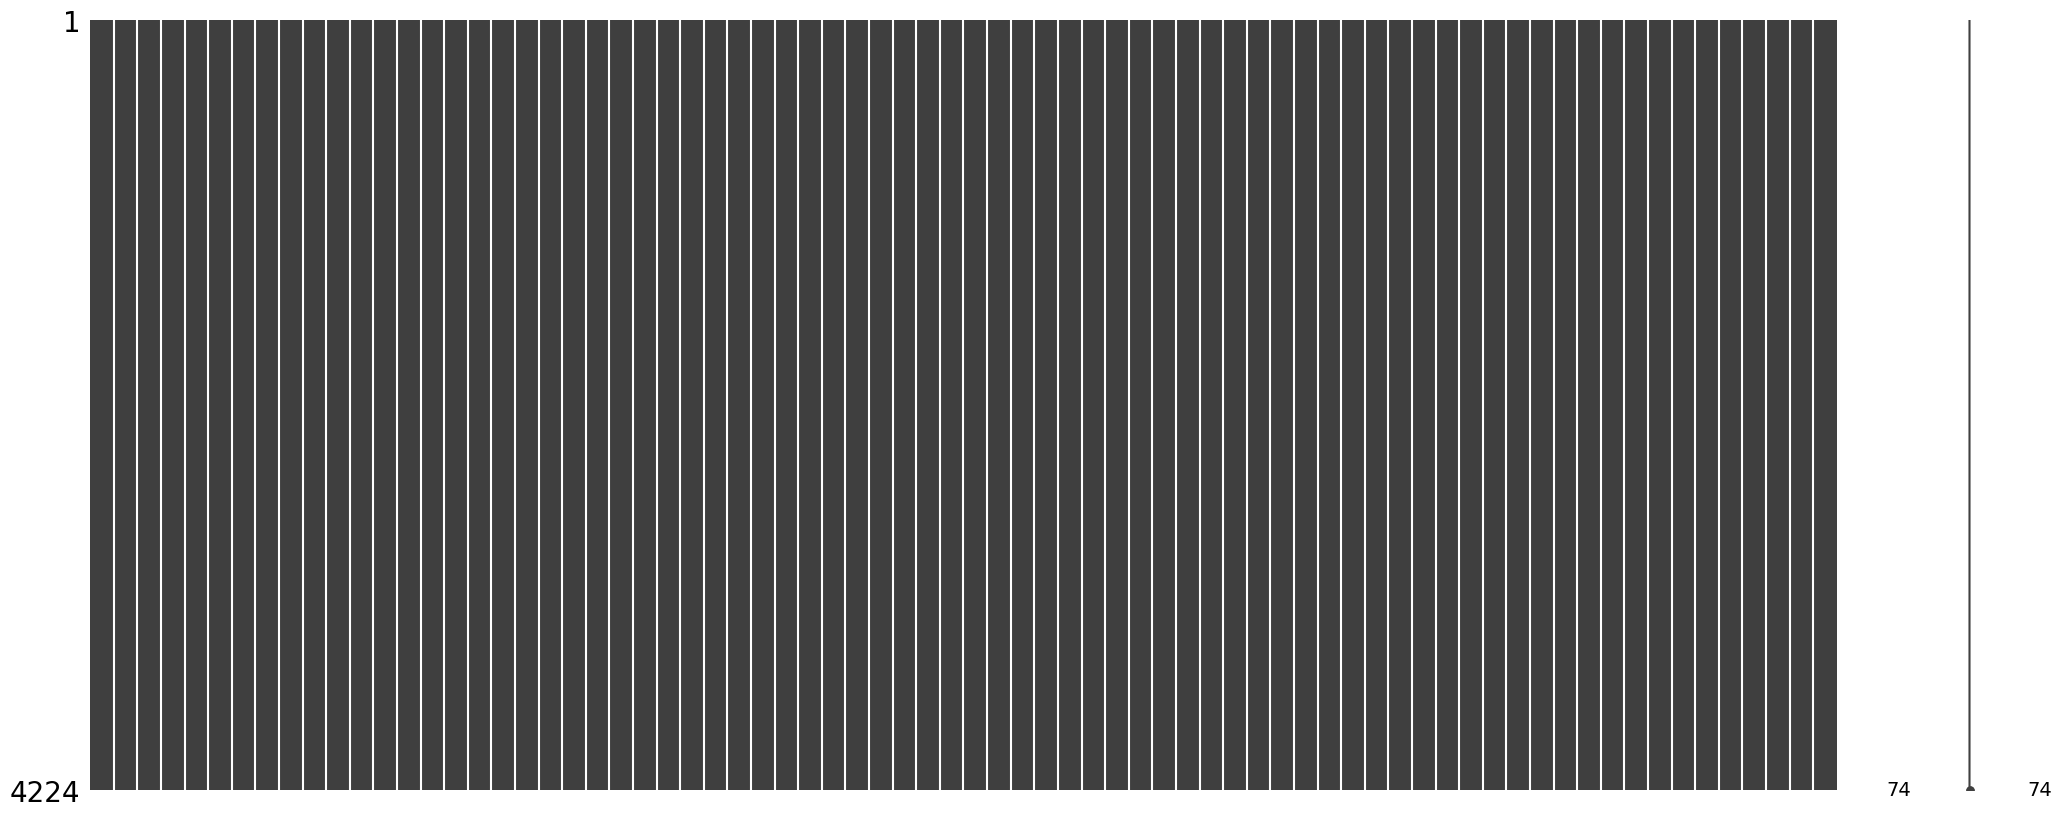

In [9]:
msno.matrix(genes)

Figure 1. This is a matrix that would show any missing values in our data frame as white. However, there are no missing values.

Text(0.5, 1.0, 'Gene dataframe visualization')

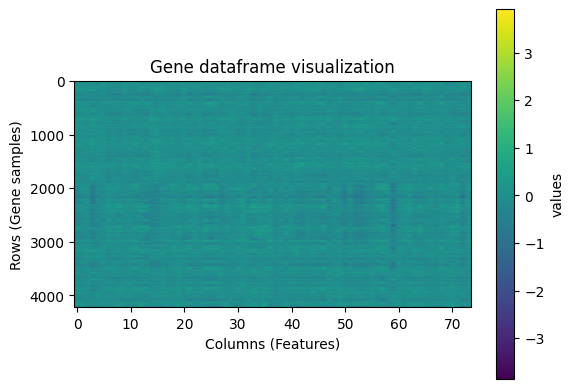

In [10]:
#also exploring it
plt.imshow(genes, cmap='viridis', aspect=.01, interpolation=None)
plt.colorbar(label='values')
plt.xlabel('Columns (Features)')
plt.ylabel('Rows (Gene samples)')
plt.title('Gene dataframe visualization')

Figure 2. Here I am getting a sense of my data - it varies from about -4 to 4, with some rows and columns tending to be higher and some tending to be lower, so there is some structure.

## II b
whiten it, normalize it, scale it. What is appropriate? discuss your choices

In [11]:
#for each feature (row), i will divide by the standard deviation and subtract the mean
#because i need them all to have the same scale, or else the variability
#in one feature will overwhelm the variability in another.

genes2 = genes.apply(lambda x: x - x.mean(), axis=0)
scaledgenes = genes2.apply(lambda x: x / x.std(), axis=0)

In [12]:
scaledgenes.describe()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
count,4.224000e+03,4.224000e+03,4.224000e+03,4224.000000,4.224000e+03,4.224000e+03,4224.000000,4.224000e+03,4.224000e+03,4224.000000,...,4.224000e+03,4.224000e+03,4.224000e+03,4.224000e+03,4.224000e+03,4.224000e+03,4.224000e+03,4224.000000,4.224000e+03,4224.000000
mean,1.345725e-17,-6.728624e-18,3.364312e-18,0.000000,-1.345725e-17,-2.018587e-17,0.000000,-1.345725e-17,-1.345725e-17,0.000000,...,-1.682156e-18,-6.728624e-18,-2.691450e-17,-2.691450e-17,2.018587e-17,-2.691450e-17,1.345725e-17,0.000000,1.345725e-17,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000
min,-4.199719e+00,-5.140951e+00,-9.362212e+00,-4.880518,-5.591093e+00,-7.934449e+00,-4.672460,-5.159309e+00,-6.615240e+00,-6.191250,...,-6.040637e+00,-7.874802e+00,-8.440918e+00,-5.342397e+00,-7.574975e+00,-7.478778e+00,-6.657720e+00,-6.056649,-5.188837e+00,-4.512031
25%,-5.981078e-01,-5.864216e-01,-5.526800e-01,-0.603886,-5.282041e-01,-5.105431e-01,-0.660054,-5.547518e-01,-5.384174e-01,-0.593476,...,-5.863185e-01,-6.044724e-01,-5.112717e-01,-6.112651e-01,-5.853604e-01,-5.179911e-01,-5.138391e-01,-0.538128,-5.581441e-01,-0.602488
50%,4.990014e-02,3.313987e-02,-4.036366e-02,0.091358,6.831741e-02,6.239544e-02,-0.078483,3.268453e-02,-2.311279e-02,0.024736,...,1.351911e-02,2.004909e-02,4.151154e-02,7.636170e-02,-5.578059e-02,6.534890e-02,-2.360104e-02,-0.041172,9.091974e-02,-0.042100
75%,6.565630e-01,6.065783e-01,5.167643e-01,0.702782,6.105700e-01,5.981529e-01,0.560063,6.066211e-01,5.455872e-01,0.602674,...,5.686903e-01,6.117879e-01,5.625201e-01,6.728928e-01,5.296030e-01,6.134482e-01,4.972099e-01,0.491143,6.616427e-01,0.553314
max,4.968822e+00,4.804399e+00,7.190527e+00,3.027975,5.349004e+00,6.042113e+00,5.297402,5.250088e+00,5.809594e+00,9.090265,...,6.409218e+00,4.902684e+00,5.998583e+00,3.933651e+00,6.237349e+00,4.444477e+00,5.382732e+00,6.628797,3.242050e+00,4.902954


In [13]:

scaledgenes.mean(0).round(2), scaledgenes.std(0)

(1     0.0
 2    -0.0
 3     0.0
 4     0.0
 5    -0.0
      ... 
 83   -0.0
 84    0.0
 85    0.0
 86    0.0
 87    0.0
 Length: 74, dtype: float64,
 1     1.0
 2     1.0
 3     1.0
 4     1.0
 5     1.0
      ... 
 83    1.0
 84    1.0
 85    1.0
 86    1.0
 87    1.0
 Length: 74, dtype: float64)

Text(0.5, 1.0, 'Gene dataframe visualization, preprocessed')

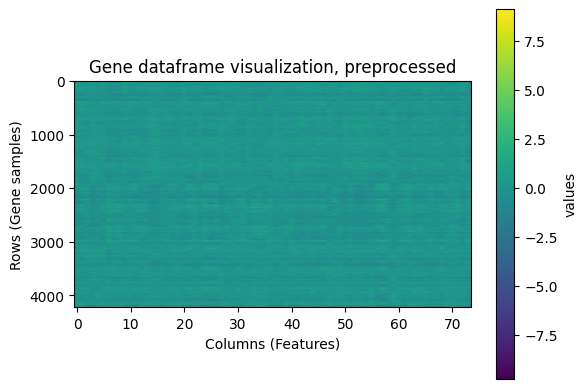

In [14]:
#also exploring it
plt.imshow(scaledgenes, cmap='viridis', aspect=.01, interpolation=None)
plt.colorbar(label='values')
plt.xlabel('Columns (Features)')
plt.ylabel('Rows (Gene samples)')
plt.title('Gene dataframe visualization, preprocessed')

Figure 3. Here we can see a similar plot to Figure 2, but now we have preprocessed the data. The values now take a range from about -8 to 8. The structure in the data is similar (although ratios between features have changed).

# III Visualize the data


## III-a calculate and plot a t-SNE rojection of the data on an optimal 2D plane

The hyperparameteres perplexity and possibly early_exaggeration may significantly impact the result. Find values that give you some structure in the data. Make sure you read the docstring and info on tSNE!

In [15]:
twodproj = skl.manifold.TSNE(perplexity=50, early_exaggeration=55,random_state=302).fit_transform(scaledgenes.values)


plot the TSNE 2D projection


Text(0, 0.5, 'feature 2')

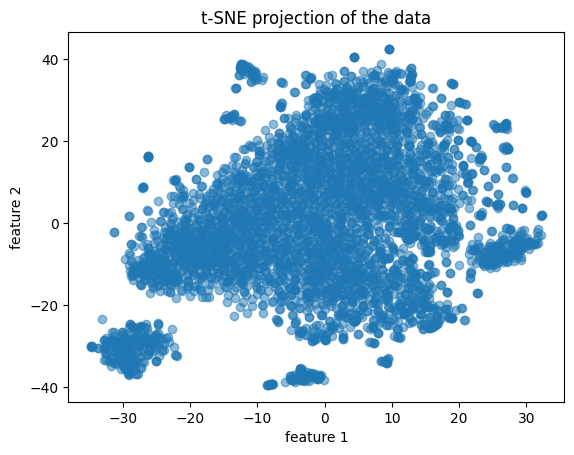

In [16]:
plt.scatter(twodproj[:,0], twodproj[:,1], alpha=.5)
plt.title("t-SNE projection of the data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")

Figure 4. This is a t-SNE projection of the feature space embedded into two dimensions. Due to extensive fine-tuning of parameters, we can see some obvious clumps and outliers in the data.

In [17]:
twodproj.shape

(4224, 2)

## III-b calculate and plot the UMAP 2D projection

In [18]:
mapper = umap.UMAP(n_neighbors=40, min_dist=.01, random_state=42)
embedding = mapper.fit_transform(scaledgenes)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [19]:
embedding.shape

(4224, 2)

Text(0, 0.5, 'feature 2')

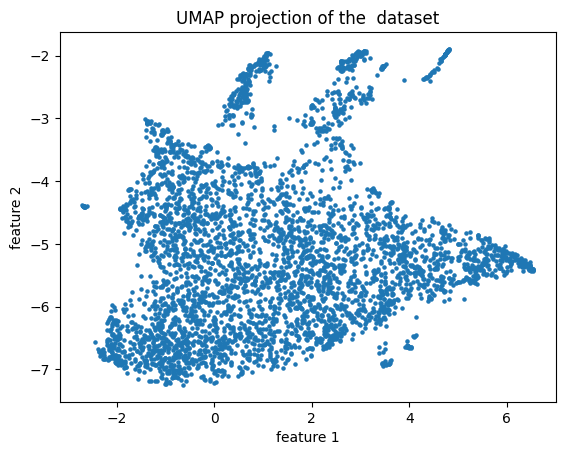

In [20]:
plt.scatter(embedding[:, 0], embedding[:, 1],  s=5)
plt.title('UMAP projection of the  dataset');
plt.xlabel("feature 1")
plt.ylabel("feature 2")

Figure 5. This is a UMAP projection of the data into two dimensions. There is clear structure, with groups and outliers. It looks completely different from the t-SNE projection. It also changes completely when I adjust the parameters.

/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

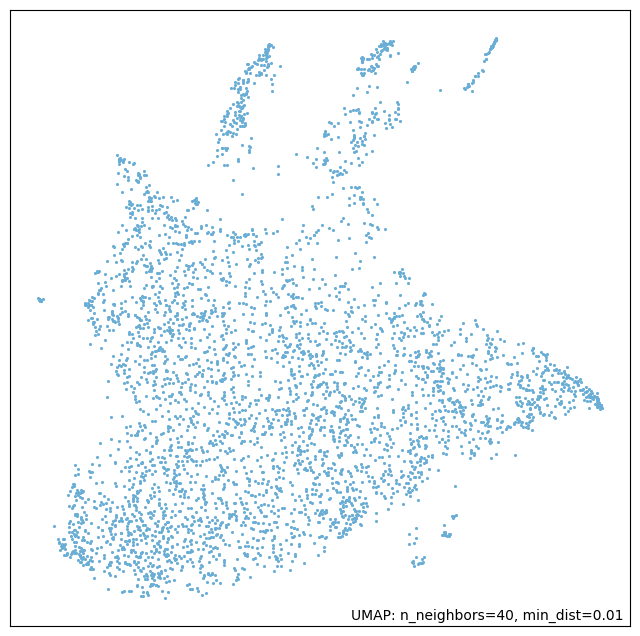

In [21]:
umap.plot.points(mapper)

Figure 6. This is the same as Figure 5 but using their built-in plotting function. It also shows the umap parameters that were used: n_neighbors=40, which controls how much UMAP focuses on global vs local structure, and min_dist=.01, which controls how tightly points clump together in the algorithm.

# IV K-MEANS Clustering

## IV-a find the best number of culsters for this dataset

create a function that measures the intracluster variance

the intracluster variance is the sum of the variance of each cluster
$V =\sum_J \sum_i{(X_{i\in j} - \bar{X_j})^2}$ for $i$ points in $j$ clusters

In [22]:
len(scaledgenes.values)

4224

In [23]:
def calICVar(X, labels, centroids):
    """calculates the intracluster variance of the k-MEANS algorithm
    X: the input data (ndarray)
    labels: the labels indicating the cluster of each datapoint: same number of data as X
    centroids: list of centroids
    """
    #okay so we need the mean of each cluster
    #number of clusters is the number of distinct elements in labels
    #somehow we need to account for all 74 features i think
    n_clusters = np.max(labels)+1 #also the number of centroids
    #if x is in cluster j, we want to subtract the mean of j from the value of x
    # means = np.zeros((n_clusters, len(scaledgenes.values)))
    # for j in range(n_clusters):
    #   mean = np.sum(X[labels==j])/np.sum([labels==j])
    #   means[j] = mean
    #now we have the means
    # vars=[] #will fill this up with the variances and then sum
    # for j in range(n_clusters): #need the right number but don't know how many elements
    #   vars.append([])
    icvar = 0
    for i, row in enumerate(X):
      x_lab = labels[i]
      diff = (np.linalg.norm(row - centroids[x_lab]))**2
      icvar+=diff
      # vars[x_lab].append(diff**2)
    #now we have a list of lists of variances

    return icvar


cluster the data with K-Means using 1 to 10 clusters. Calculate the intracluster variance and look for an "elbow" in the value of the intracluster variance as a function of number of clusters/ What is the optimal number of clusters?

In [24]:
vars = np.zeros(10) #list of intracluster variance values for KMeans being run with 1->10 clusters
for i in range(10):
  centroids, labels, intertia = skl.cluster.k_means(scaledgenes.values, n_clusters=(i+1), n_init=10, random_state=302)
  icvar = calICVar(scaledgenes.values, labels, centroids)
  vars[i] = icvar

In [25]:
vars

array([312502.        , 246649.58454999, 224439.16362993, 212881.39649637,
       203109.65840391, 196086.41711812, 190735.44473105, 186435.40296662,
       182935.34620949, 180248.70463193])

Text(0, 0.5, 'Intracluster variance')

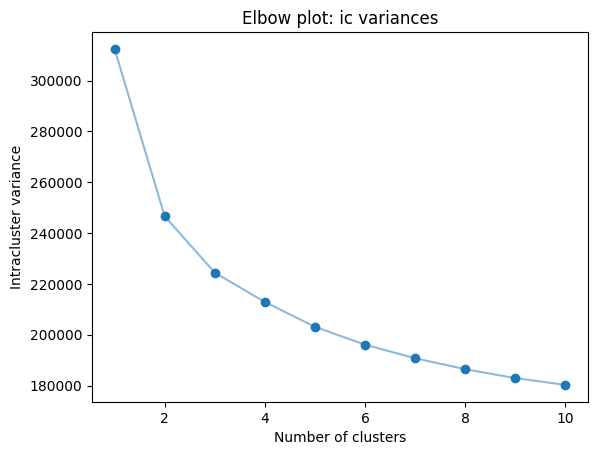

In [26]:
# elbow plot
nums = np.arange(1,11)
plt.scatter(nums, vars)
plt.plot(nums, vars, alpha=.5)
plt.title("Elbow plot: ic variances")
plt.xlabel("Number of clusters")
plt.ylabel("Intracluster variance")

Figure 7. This is a plot of how the number of clusters for our k-means clustering algorithm affects the intracluster variance. We were hoping to see an elbow, aka a sharp change in the slope of this plot. There is no obvious elbow here but it seems to change less and less after 2-3 clusters, so I will choose there to be three clusters.

Based on the elbow plot above (see also slides) what is the right number of clusters for this dataset? DISCUSS!

## IV-b Cluster the data with k-Means into the number of clusters as determined from the elbow

In [27]:
centroids, labels, intertia = skl.cluster.k_means(scaledgenes.values, n_clusters=3, n_init=10, random_state=302)

## IV-c plot and plot the t-SNY and UMAP projections of the data using the cluster number as color

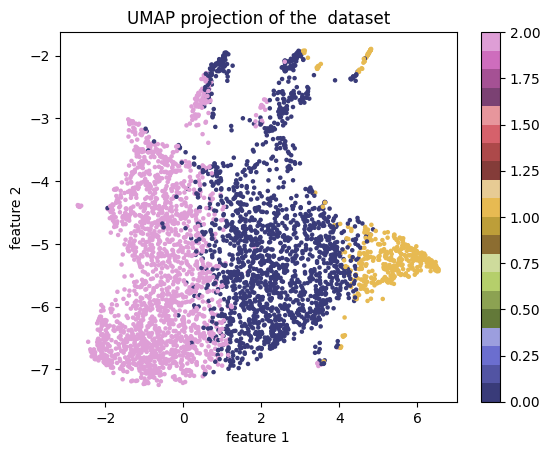

In [41]:
plt.scatter(embedding[:, 0], embedding[:, 1],  s=5, c=labels, cmap="tab20b")
plt.title('UMAP projection of the  dataset');
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.colorbar()

Figure 8. Here we can see the three clusters that k-Means found plotted on the color axis, on the umap projection plot. It appears that the clusters are highly correlated with umap's feature 1, and not correlated with umap's feature 2. The clumping in umap does not appear to correlate with the k-Means clustering.

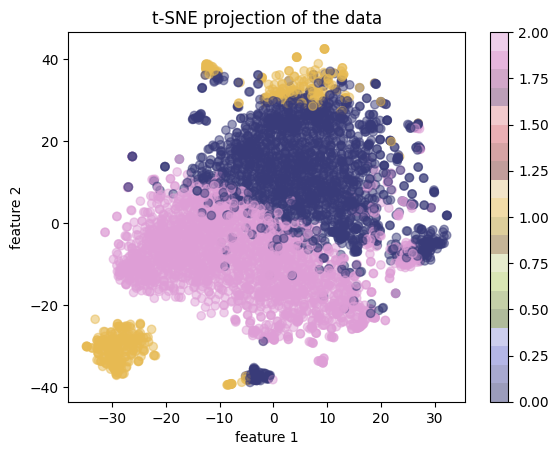

In [42]:
plt.scatter(twodproj[:,0], twodproj[:,1], alpha=.5, c=labels, cmap="tab20b")
plt.title("t-SNE projection of the data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.colorbar()

Figure 9. Here is the t-sne projection of the data with the k-Means label results as the color axis. Interestingly, the clumping of the t-sne projection does to correspond to the k-means clusters, even though the umap clustering didn't. In addition, the t-sne feature 2 seems to correlate with the k-means cluster groupings.

# Use dDSCAN or hierarchical clustering (461 pick either DBSCAN or hierarchical) and redo the clustering. Can you find the same number of clusters?

# V DBSCAN Clustering


## V-a measure the distribution of Euclidean distances

It is important to choose the hyperparamters of DBSCAN wisely. Initialize the _eps_ parameter of DBSCAN based on the mean Euclidean distance. To that end, calculate and plot the Euclidean distance matrix of each point pairs if you have not yet

In [47]:
dists = sp.spatial.distance.squareform(sp.spatial.distance.pdist(scaledgenes, 'euclidean'))

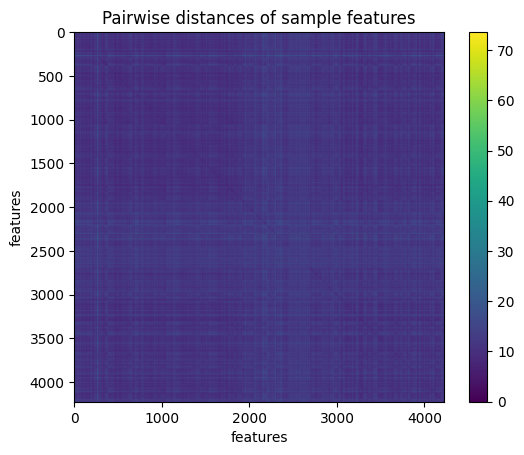

In [49]:
plt.imshow(dists)
plt.title("Pairwise distances of sample features")
plt.xlabel("features")
plt.ylabel("features")
plt.colorbar()

Figure 10. Here we can see the pairwise distances of all the features (genes). They range from about 0 to 70, with more in the lower range.

 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is below the mean

Text(0, 0.5, 'frequency')

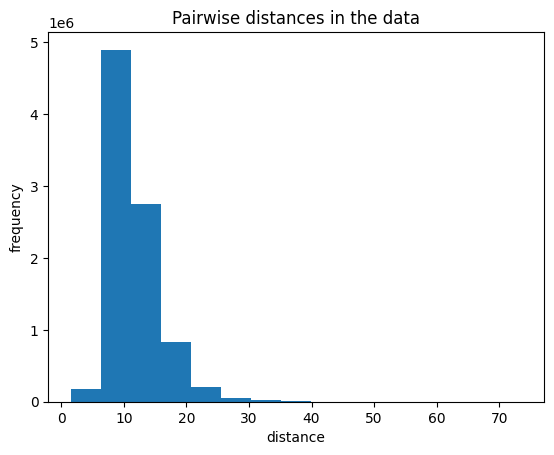

In [45]:
plt.hist(dists, bins=15)
plt.title("Pairwise distances in the data")
plt.xlabel("distance")
plt.ylabel("frequency")

Figure 11. Here we can see a histogram of the pairwise distances of the features. The mean is at 11.4, so we will choose 10 as our slightly-lower epsilon for dbscan.

In [35]:
mean_dist = np.mean(dists)
mean_dist

11.46962029857684

## V-b Rub DBSCAN

initialize the dbscan _eps_ hyperparameter value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. How many clusters do you have, how many outliers? is that a significant number?

In [59]:
geneclustersDBS = skl.cluster.DBSCAN(eps=10, min_samples=3, metric='euclidean').fit(scaledgenes.values)

np.unique(geneclustersDBS.labels_)

array([-1,  0,  1])

In [53]:
np.sum(geneclustersDBS.labels_==-1)

23

In [54]:
np.sum(geneclustersDBS.labels_==0)

4198

In [55]:
np.sum(geneclustersDBS.labels_==1)

3

DBSCAN gave us two clusters (one with 4198 points and one with 3 points) and 23 outliers. I am suspicious of the 3-point cluster. The number of outliers seems reasonable. What we cna learn from this is that almost every data point is 10 or less distance from another data point.

## V-c plot the data in the t-SNE and UMAP projections color-coded by DBSCAN cluster

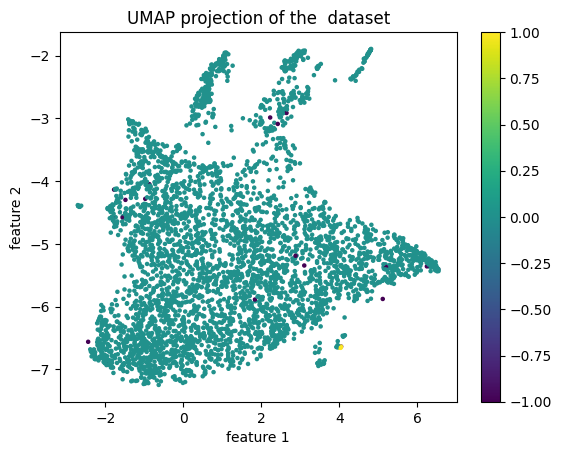

In [61]:
plt.scatter(embedding[:, 0], embedding[:, 1],  s=5, c=geneclustersDBS.labels_)
plt.title('UMAP projection of the  dataset');
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.colorbar()

Figure 12. Here we can see the results of our dbscan clustering in the umap projection - the purple points are the outliers, and the green and yellow are each clusters. The small cluster of 3 yellow points is tightly bound, but that is about all that we can see here - the outliers are randomly distributed acroess the features, as is the large group.::

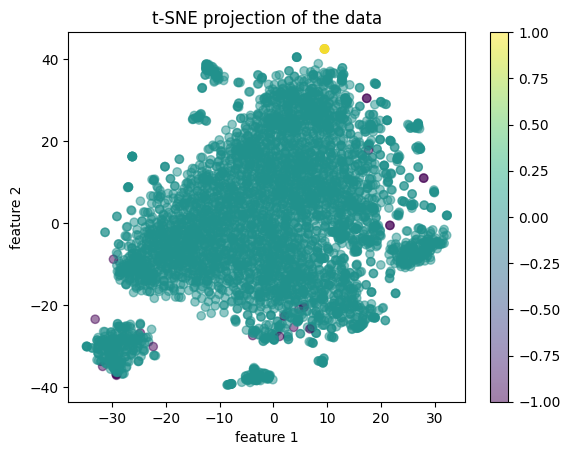

In [65]:
plt.scatter(twodproj[:,0], twodproj[:,1], alpha=.5, c=geneclustersDBS.labels_)
plt.title("t-SNE projection of the data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.colorbar()

Figure 13. Here we can see the results of our dbscan clustering - the purple points are the outliers, and the green and yellow are each clusters, on the t-sne projection. It does appear like all of the outliers are on the outside of the blob, and the small group is also outside of the main group.

# VI Agglomerative clustering


## VI-a run agglomerative clustering with standard distance choices: ward linkage and Euclidean distance

In [38]:
clusteringAg = skl.cluster.AgglomerativeClustering().fit(scaledgenes.values)

choose ward linkage and plot the dendrogram of the clusters

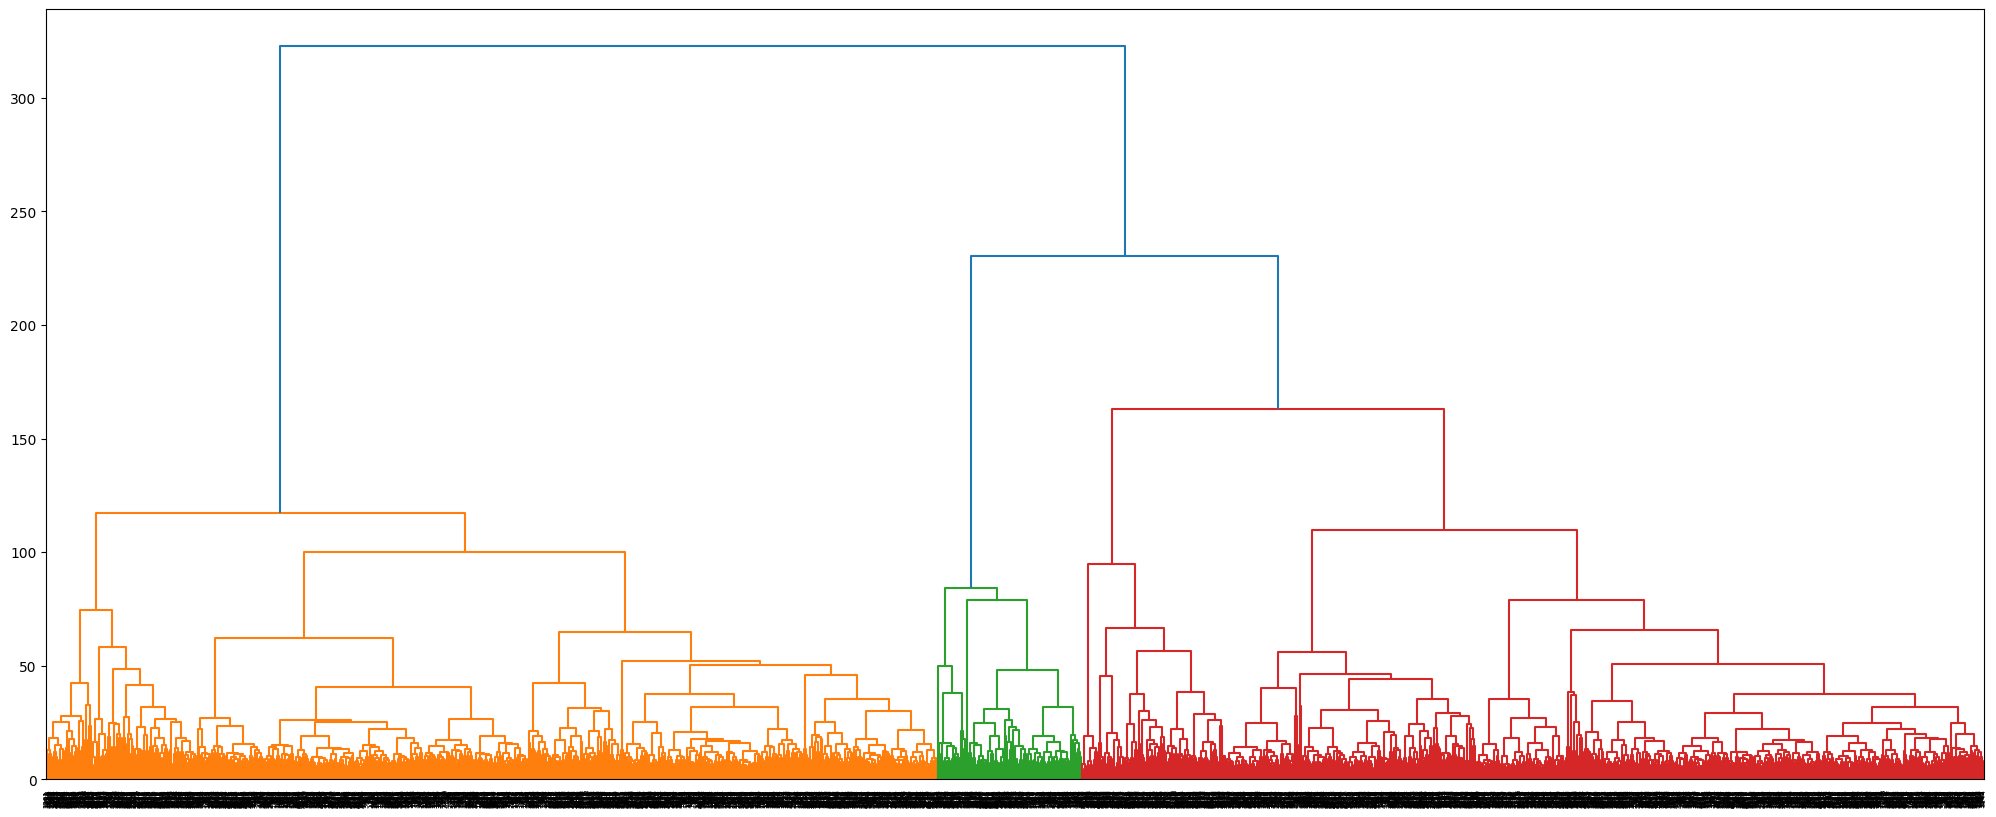

In [39]:
Z = linkage(scaledgenes, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Figure 14. This shows the results of agglomerative clustering - every feature is plotted on the base of the plot, and they are grouped by similarities. This is a deterministic process. It has automatically split into three colors, showing the groupings with the largest distance between them.

repeat with a different linkage and comment on differences

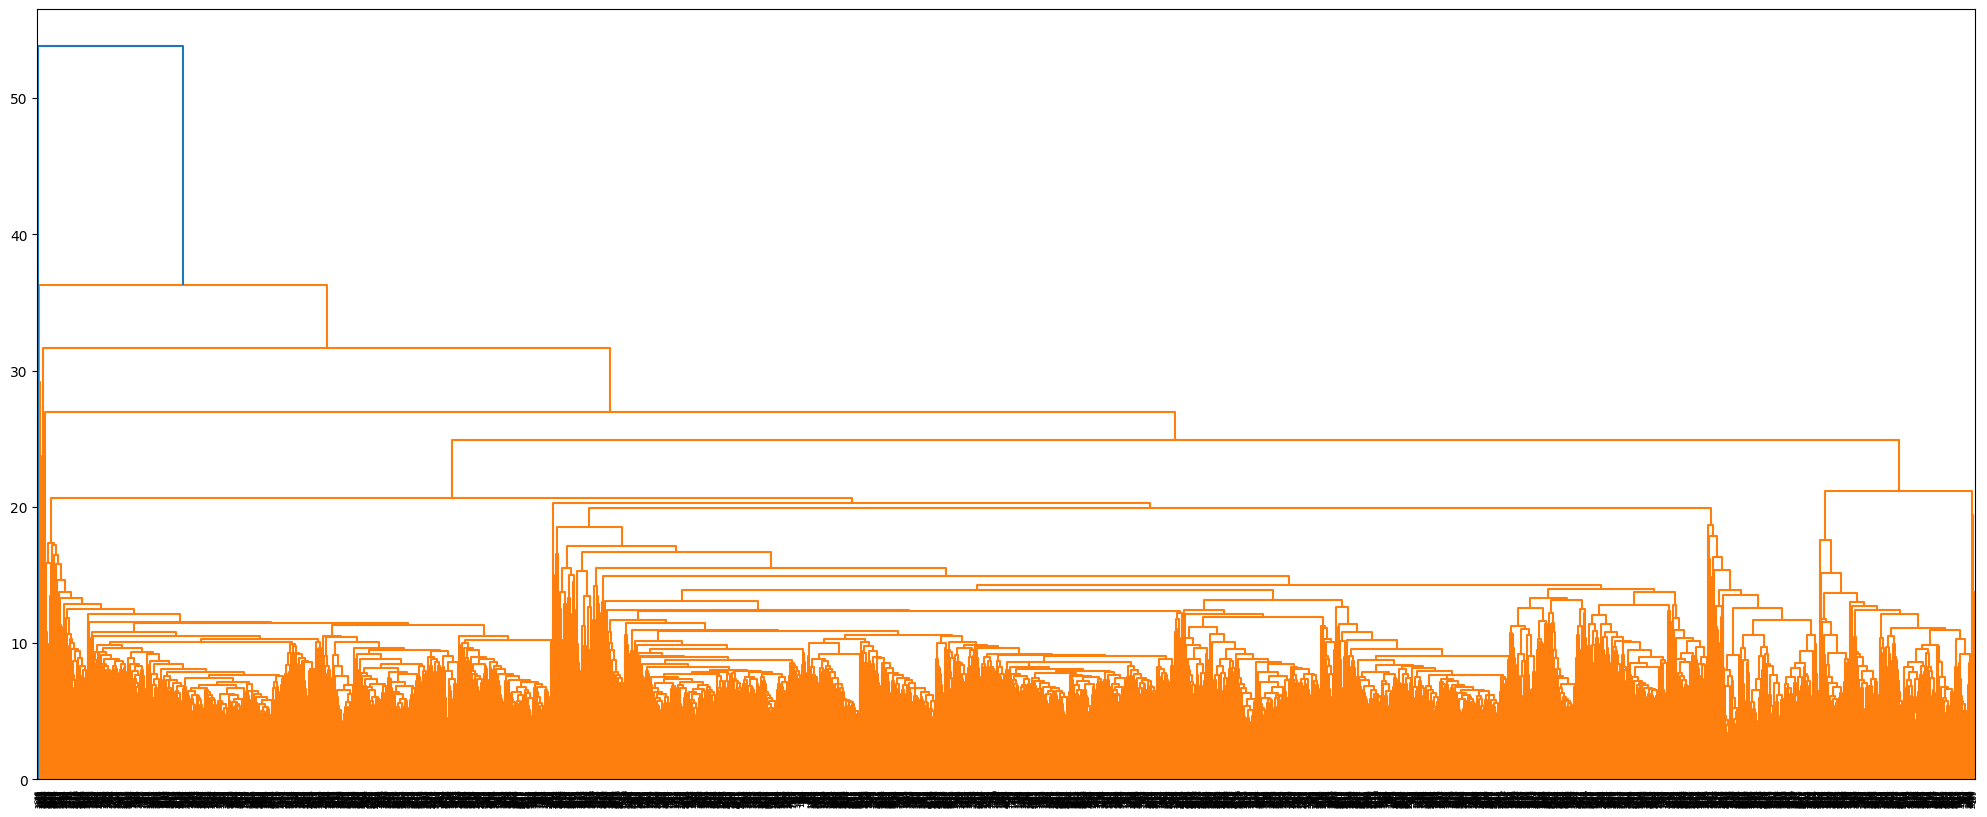

In [41]:
Z = linkage(scaledgenes, 'weighted')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Figure 15. With the weighted linkage, we can see a different dendrogram for the agglomerative clustering process. This one looks funky, with a group around zero that is almost always the "furthest away" from other clusters as they grow. THe different linkage is a different way of calculating the distance between new clusters as they form.

# VI-b rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means.



In [62]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=3).fit(scaledgenes.values)

In [63]:
geneclustersAg.labels_

array([0, 0, 0, ..., 1, 0, 0])

## VI-c plot the 2D TSNE projection colorcoded as before

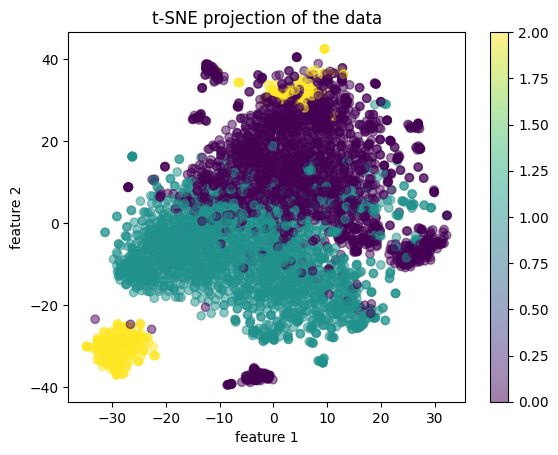

In [66]:
plt.scatter(twodproj[:,0], twodproj[:,1], alpha=.5, c=geneclustersAg.labels_)
plt.title("t-SNE projection of the data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.colorbar()

Figure 16. Here we can see data with the agglomerative clustering into three clusters on the color axis, plotted with the two t-sne features on the x and y axis. The clusters correspond well to the clumping of the data in the t-sne feature space, as well as corresponding well to t-sne feature 2 (it does not correlate very much with feature 1). This plot looks quite similar to the k-means clustering labels.

# VII Comment, in the spirit of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC187526, which was the most "useful" method for clustering

If I had to use a clustering method to gain insight into this data, I would use agglomerative clustering. It agrees with k-means clustering and correlates with the t-sne projection of the data, which gives me confidence that something meaningful is being extracted from the data. Plus, it is deterministic. The downside is that it takes longer to run, but on a dataset of this size that is not an issue. My other main takeaway is that the 2D projections really don't contain any meaning in the shapes that you see in their feature spaces, because they are so sensitive to initial conditions - you can basically make them look however you want. At the same time, I am glad that we have a way to visualize the data in 2 dimensions.